# Data Collection and Exploration


In [3]:

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import OneHotEncoder, StandardScaler


data = pd.read_csv(r'C:\Certifications\Codsoft Intern\Task 2\IMDb Movies India.csv')

In [4]:
data.describe()

,Year,Rating,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13
count,14981.000000,7919.000000,0.0,0.0,0.0,1.0
mean,1987.012215,5.841621,NaN,NaN,NaN,-1.0
std,25.416689,1.381777,NaN,NaN,NaN,NaN
min,1913.000000,1.100000,NaN,NaN,NaN,-1.0
25%,1968.000000,4.900000,NaN,NaN,NaN,-1.0
50%,1991.000000,6.000000,NaN,NaN,NaN,-1.0
75%,2009.000000,6.800000,NaN,NaN,NaN,-1.0
max,2022.000000,10.000000,NaN,NaN,NaN,-1.0


In [5]:
data.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13
0,#Gadhvi (He thought he was Gandhi),2019,109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid,NaN,NaN,NaN,-1.0
1,#Homecoming,2021,90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana,NaN,NaN,NaN,NaN
2,#Yaaram,2019,110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor,NaN,NaN,NaN,NaN
3,...And Once Again,2010,105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali,NaN,NaN,NaN,NaN
4,...Aur Pyaar Ho Gaya,1997,147 min,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor,NaN,NaN,NaN,NaN


In [6]:
data.tail()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13
14976,Zulm Ko Jala Doonga,1988,NaN,Action,4.6,11,Mahendra Shah,Naseeruddin Shah,Sumeet Saigal,Suparna Anand,NaN,NaN,NaN,NaN
14977,Zulmi,1999,129 min,"Action, Drama",4.5,655,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani,NaN,NaN,NaN,NaN
14978,Zulmi Raj,2005,NaN,Action,NaN,NaN,Kiran Thej,Sangeeta Tiwari,NaN,NaN,NaN,NaN,NaN,NaN
14979,Zulmi Shikari,1988,NaN,Action,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14980,Zulm-O-Sitam,1998,130 min,"Action, Drama",6.2,20,K.C. Bokadia,Dharmendra,Jaya Prada,Arjun Sarja,NaN,NaN,NaN,NaN


In [7]:
data.shape


(14981, 14)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14981 entries, 0 to 14980
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         14981 non-null  object 
 1   Year         14981 non-null  int64  
 2   Duration     7115 non-null   object 
 3   Genre        13140 non-null  object 
 4   Rating       7919 non-null   float64
 5   Votes        7920 non-null   object 
 6   Director     14484 non-null  object 
 7   Actor 1      13493 non-null  object 
 8   Actor 2      12784 non-null  object 
 9   Actor 3      12074 non-null  object 
 10  Unnamed: 10  0 non-null      float64
 11  Unnamed: 11  0 non-null      float64
 12  Unnamed: 12  0 non-null      float64
 13  Unnamed: 13  1 non-null      float64
dtypes: float64(5), int64(1), object(8)
memory usage: 1.6+ MB


In [9]:
data.isnull().sum()

Name               0
Year               0
Duration        7866
Genre           1841
Rating          7062
Votes           7061
Director         497
Actor 1         1488
Actor 2         2197
Actor 3         2907
Unnamed: 10    14981
Unnamed: 11    14981
Unnamed: 12    14981
Unnamed: 13    14980
dtype: int64

# Data processing


## Removing unrelated columns

In [12]:
data.columns

Index(['Name', 'Year', 'Duration', 'Genre', 'Rating', 'Votes', 'Director',
       'Actor 1', 'Actor 2', 'Actor 3', 'Unnamed: 10', 'Unnamed: 11',
       'Unnamed: 12', 'Unnamed: 13'],
      dtype='object')

In [13]:
data.drop(columns=['Unnamed: 10', 'Unnamed: 11',
       'Unnamed: 12', 'Unnamed: 13'], inplace=True)

In [14]:
data.columns

Index(['Name', 'Year', 'Duration', 'Genre', 'Rating', 'Votes', 'Director',
       'Actor 1', 'Actor 2', 'Actor 3'],
      dtype='object')

In [15]:
data.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,#Gadhvi (He thought he was Gandhi),2019,109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
1,#Homecoming,2021,90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
2,#Yaaram,2019,110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
3,...And Once Again,2010,105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali
4,...Aur Pyaar Ho Gaya,1997,147 min,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor


## Using different function to handel null values of different coluns

In [17]:
data.dropna(subset=['Rating', 'Votes'], inplace=True)

data['Duration'] = data['Duration'].astype(str)
data['Duration'] = pd.to_numeric(data['Duration'].str.extract('(\d+)', expand=False), errors='coerce')
data['Duration'].fillna(data['Duration'].median(), inplace=True)


data['Votes'] = pd.to_numeric(data['Votes'].str.replace(',', ''), errors='coerce')
data['Votes'].fillna(data['Votes'].median(), inplace=True)

data['Genre'].fillna(data['Genre'].mode()[0], inplace=True)
data['Director'].fillna('Unknown', inplace=True)
data['Actor 1'].fillna('Unknown', inplace=True)
data['Actor 2'].fillna('Unknown', inplace=True)
data['Actor 3'].fillna('Unknown', inplace=True)



In [18]:
data.isnull().sum()

Name        0
Year        0
Duration    0
Genre       0
Rating      0
Votes       0
Director    0
Actor 1     0
Actor 2     0
Actor 3     0
dtype: int64

# Data Correlation

              Year  Duration    Rating     Votes
Year      1.000000 -0.290445 -0.166673  0.129016
Duration -0.290445  1.000000 -0.030474  0.095931
Rating   -0.166673 -0.030474  1.000000  0.126635
Votes     0.129016  0.095931  0.126635  1.000000


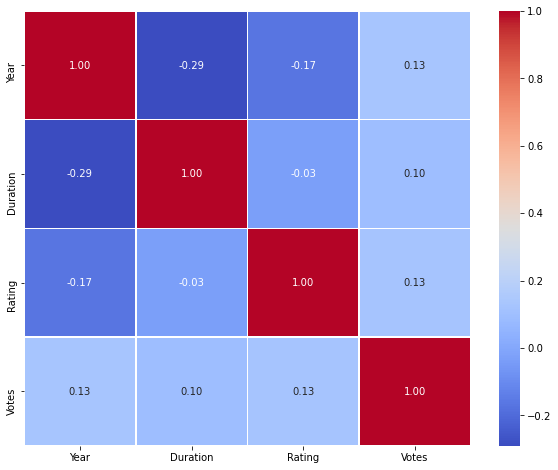

In [20]:
correlation_matrix = data.corr()
print (correlation_matrix)
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.show()


# Changing data into numeric

In [22]:

encoder = OneHotEncoder(sparse=False, handle_unknown='ignore')
encoded_features = encoder.fit_transform(data[['Genre', 'Director', 'Actor 1', 'Actor 2', 'Actor 3']])
data['Year'] = data['Year'].astype(int)
scaler = StandardScaler()
data[['Year', 'Duration', 'Votes']] = scaler.fit_transform(data[['Year', 'Duration', 'Votes']])

# Feature engineering

In [23]:

data['Director_Avg_Rating'] = data.groupby('Director')['Rating'].transform('mean')


data['Director_Avg_Rating'].fillna(data['Rating'].mean(), inplace=True)

print(data[['Director', 'Rating', 'Director_Avg_Rating']].head())


         Director  Rating  Director_Avg_Rating
0   Gaurav Bakshi     7.0             7.000000
2      Ovais Khan     4.4             4.400000
4    Rahul Rawail     4.7             5.358824
5  Shoojit Sircar     7.4             7.500000
7   Allyson Patel     5.6             5.600000


# Model and its Evaluation

In [37]:

X = np.hstack((data[['Year', 'Duration', 'Votes', 'Director_Avg_Rating']], encoded_features))
y = data['Rating']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 0.6242452020202021


Mean Squared Error: 0.624245202020202
Mean Absolute Error: 0.5241287878787879
R-squared: 0.664229979481614


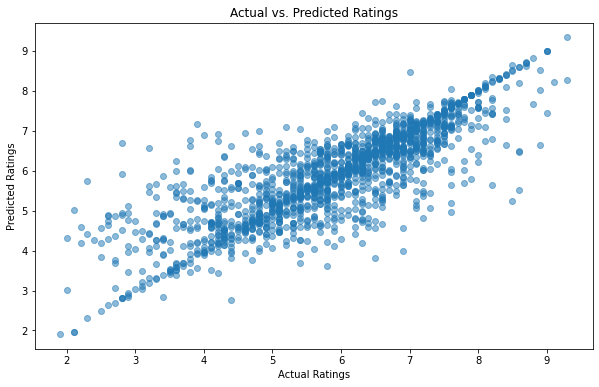

In [38]:
from sklearn.metrics import mean_absolute_error, r2_score
import matplotlib.pyplot as plt

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error: {mae}")

r2 = r2_score(y_test, y_pred)
print(f"R-squared: {r2}")

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel('Actual Ratings')
plt.ylabel('Predicted Ratings')
plt.title('Actual vs. Predicted Ratings')
plt.show()